In [ ]:
!pip install igraph

In [ ]:
import pandas as pd;
import igraph as ig
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('clubeceticismo_dataset.csv', sep=',', encoding = "utf-8", usecols=[0,1,2,3,4,5,6,7,8,9], names=["Topic ID", "Post ID", "Topic Name", "Forum Name", "Topic Link", "Username", "User Link", "User Total Messages", "Post Date Time", "Post Content"])
dataset.head()

,Topic ID,Post ID,Topic Name,Forum Name,Topic Link,Username,User Link,User Total Messages,Post Date Time,Post Content
0,1,0,Mudança e melhoria do Sistema do Fórum,Quadro de avisos,https://clubeceticismo.com.br/viewtopic.php?f=...,Gabarito,https://clubeceticismo.com.br/memberlist.php?m...,1628,2023-02-09T00:20:26+00:00,Eu gostaria de informar algumas novidades no n...
1,1,1,Mudança e melhoria do Sistema do Fórum,Quadro de avisos,https://clubeceticismo.com.br/viewtopic.php?f=...,Gabarito,https://clubeceticismo.com.br/memberlist.php?m...,1628,2023-02-09T00:21:03+00:00,NadaSei está finalizando uma fusão entre o nos...
2,2,0,Mecanismo de busca do fórum,Quadro de avisos,https://clubeceticismo.com.br/viewtopic.php?f=...,Gabarito,https://clubeceticismo.com.br/memberlist.php?m...,1628,2023-01-21T01:10:38+00:00,"<blockquote><div><cite><a href=""./memberlist.p..."
3,3,0,Listagem de todos os tópicos do fórum,Quadro de avisos,https://clubeceticismo.com.br/viewtopic.php?f=...,Gabarito,https://clubeceticismo.com.br/memberlist.php?m...,1628,2022-08-02T00:55:21+00:00,NaN
4,3,1,Listagem de todos os tópicos do fórum,Quadro de avisos,https://clubeceticismo.com.br/viewtopic.php?f=...,Gabarito,https://clubeceticismo.com.br/memberlist.php?m...,1628,2022-08-02T00:57:42+00:00,NaN


In [ ]:
import numpy as np

topicArea = dataset['Forum Name'].unique().tolist()
dicionarioTopicArea = {indice: valor for indice, valor in enumerate(topicArea)}
print(dicionarioTopicArea)

{0: 'Quadro de avisos', 1: 'Área de Testes', 2: 'Reclamações e Sugestões', 3: 'Ateísmo e Agnosticismo', 4: 'Ceticismo', 5: 'Ciência, Tecnologia e Saúde', 6: 'História, Sociedade, Comportamento e Filosofia', 7: 'Laicismo, Política e Economia', 8: 'Origens e Evolução', 9: 'Religiões, Crenças e Mitos', 10: 'Teorias da conspiração', 11: 'Papo Furado', 12: 'Piadas e Brincadeiras', 13: 'Música, Arte e Cultura', 14: 'Redes Sociais'}


In [ ]:
import networkx as nx

def plotar_grafo(matriz, dicionario, titulo, filename):
    # Criar um objeto de gráfico não-direcionado a partir da matriz de adjacência
    G = nx.Graph()

    # Adicionar nós ao gráfico
    num_nodes = len(matriz)
    G.add_nodes_from(range(num_nodes))

    # Adicionar arestas ponderadas ao gráfico com base na matriz de adjacência
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if matriz[i][j] > 0:
                G.add_edge(i, j, weight=matriz[i][j]*0.2)

    # Layout para a posição dos nós (spring_layout é um layout padrão)
    pos = nx.spring_layout(G)

    # Obter os pesos das arestas
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

    # Calcular o tamanho das linhas com base no peso das arestas
    edge_width = [d['weight'] for u, v, d in G.edges(data=True)]
    nx.write_gexf(G, filename)

    # Plotar o gráfico com tamanhos de linha ajustados de acordo com o peso
    nx.draw(G, pos, with_labels=True,labels=dicionario, node_size=500, node_color='lightblue', font_size=12, font_color='black', font_weight='bold', width=edge_width)
    plt.title(titulo)
    plt.show()

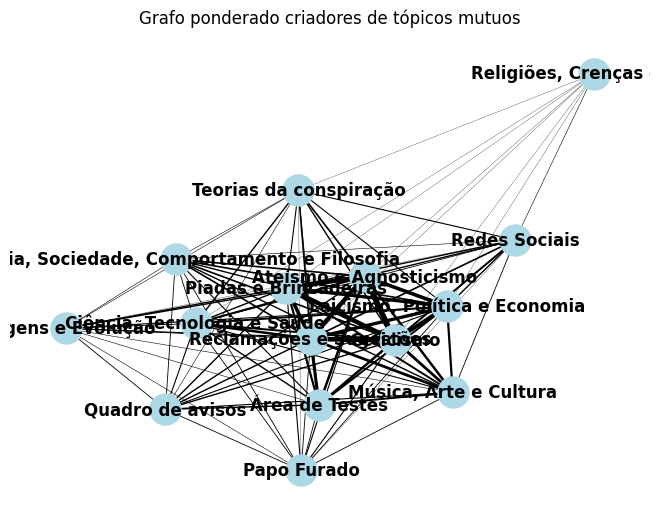

In [ ]:
from networkx.algorithms.bipartite import matrix
postOriginal = dataset[dataset["Post ID"]==0]
postOriginal = postOriginal[['Forum Name', 'Username']]
# postOriginal = postOriginal.drop_duplicates()
# Usar pivot_table para reorganizar os dados
pivot_table_df = postOriginal.pivot_table(index='Forum Name', columns='Username', values='Username', aggfunc='size', fill_value=0)
pivot_table_df

def indices_valores_diferentes_de_zero(lista):
    indices = [i for i, valor in enumerate(lista) if valor != 0]
    return indices

def adicionar_um_mutuamente(matriz, array_indices):
    for indice_inicial in array_indices:
      for indice in array_indices:
          matriz[indice_inicial, indice] += 1

matriz = np.zeros((len(dicionarioTopicArea), len(dicionarioTopicArea)))

for coluna in pivot_table_df.columns:
    valores_coluna = pivot_table_df[coluna].tolist()  # Converta a coluna em uma lista
    # print(f'Valores da coluna {coluna}: {valores_coluna}')
    adicionar_um_mutuamente(matriz, indices_valores_diferentes_de_zero(valores_coluna))
plotar_grafo(matriz, dicionarioTopicArea, 'Grafo ponderado criadores de tópicos mutuos', 'grafo_ponderado_criadores_de_topico_mutuos.gexf')

In [ ]:
import csv

topicTitle = dataset['Topic Name'].unique().tolist()

csvFile = open('topics_labels.csv', 'w', newline='', encoding='utf-8')
writer = csv.writer(csvFile)
for (index, topic) in enumerate(topicTitle):
  writer.writerow([index, topic])

csvFile.close()

dicionarioTopics = {indice: valor for indice, valor in enumerate(topicTitle)}
dicionarioTopics

{0: 'Mudança e melhoria do Sistema do Fórum',
 1: 'Mecanismo de busca do fórum',
 2: 'Listagem de todos os tópicos do fórum',
 3: 'Novo acervo do Religião é Veneno',
 4: 'Problema no servidor - 07/02/2023',
 5: 'Aniversário dos fóruns que deram continuidade ao fCC',
 6: 'Avatares para todos',
 7: 'Backup do fórum',
 8: 'Comunicados gerais',
 9: 'Migração do fórum Manjaro BR',
 10: 'Por onde andam antigos participantes?',
 11: 'Aplicativo Clube Veneno para Android',
 12: 'Solução temporária para resolver problemas com a mudança do tema do fórum',
 13: 'Dúvidas a respeito de postagem de vídeos',
 14: 'Tópico de teste - Fusão de Origem e Destino',
 15: 'Tópico de teste - Mover postagens - Destino (Cópia)',
 16: 'Tópico de teste - Mover postagens - Destino',
 17: 'Tópico de teste - Mover postagens - Origem',
 18: 'Tópico de teste - Mover postagens - Origem (Cópia)',
 19: 'Ùltimo teste',
 20: 'Teste de download',
 21: 'Teste de criação de típico',
 22: 'Teste de Cores',
 23: 'Teste de image

In [ ]:
from networkx.algorithms.bipartite import matrix
postOriginal = dataset[['Topic Name', 'Username']]
postOriginal = postOriginal.drop_duplicates()
# Usar pivot_table para reorganizar os dados
pivot_table_df = postOriginal.pivot_table(index='Topic Name', columns='Username', values='Username', aggfunc='size', fill_value=0)
pivot_table_df

matrizTopics = np.zeros((len(dicionarioTopics), len(dicionarioTopics)))

for coluna in pivot_table_df.columns:
    valores_coluna = pivot_table_df[coluna].tolist()
    adicionar_um_mutuamente(matrizTopics, indices_valores_diferentes_de_zero(valores_coluna))


arestas = 0
for linha in matrizTopics:
    for elemento in linha:
        if elemento != 0:
            arestas += 1
print("numero de arestas", arestas)

plotar_grafo(matrizTopics, dicionarioTopics, 'Relação entre topicos', 'relacao_entre_topicos.gexf')

NameError: ignored

In [ ]:
topicTitle = dataset['Username'].unique().tolist()
dicionarioUsername = {indice: valor for indice, valor in enumerate(topicTitle)}
dicionarioUsername

{0: 'Gabarito',
 1: 'Fernando Silva',
 2: 'Pedro Reis',
 3: 'Agnoscetico',
 4: 'Tutu',
 5: 'NadaSei',
 6: 'Gigaview',
 7: 'Cmte Euclides',
 8: 'Zero',
 9: 'Cinzu',
 10: 'criso',
 11: 'Titoff',
 12: 'Gorducho',
 13: 'Arcanjo Lúcifer',
 14: 'Igor Isaias Banlian',
 15: 'Percival',
 16: 'devil´s Curve',
 17: 'Pasteur',
 18: 'Johnny Cash',
 19: 'Jurubeba',
 20: 'Johnny',
 21: 'JJ_JJ',
 22: 'anne cunha',
 23: 'JungF',
 24: 'Hipatia',
 25: 'Sybok',
 26: 'Danilo Sampaio',
 27: 'Asimov',
 28: 'Huxley',
 29: 'EuSouOqueSou',
 30: 'Digão',
 31: 'jesuscraciaNÃO',
 32: 'f0rest',
 33: 'O organoléptico',
 34: 'f0rest2.0',
 35: 'SchizoGuy',
 36: 'fenrir',
 37: 'AndarilhoTerrestre',
 38: 'Tash',
 39: 'mmvalentim',
 40: 'Inconførmed',
 41: 'Batman',
 42: 'Tupac',
 43: 'Oriana',
 44: 'Tirn Aill',
 45: 'FredLC',
 46: 'Adam Weishaupt',
 47: 'nuker',
 48: 'Conceito',
 49: 'Cal Kestis',
 50: 'eremita',
 51: 'Frencisco Toucinho',
 52: 'Eu...',
 53: 'Silvana',
 54: 'NOVAG',
 55: 'Razão',
 56: 'Jack Brucutu',
 5

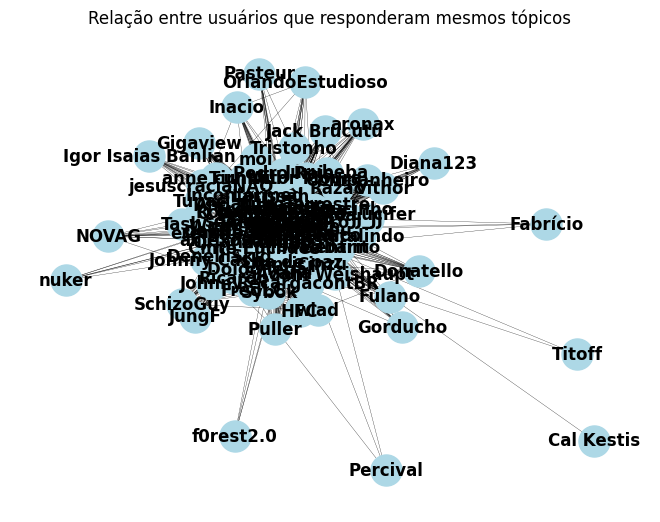

In [ ]:
from networkx.algorithms.bipartite import matrix
# postOriginal = dataset[dataset["Post ID"]==0]
postOriginal = dataset[['Topic Name', 'Username']]
postOriginal = postOriginal.drop_duplicates()
# Usar pivot_table para reorganizar os dados
pivot_table_df = postOriginal.pivot_table(index='Username', columns='Topic Name', values='Topic Name', aggfunc='size', fill_value=0)
pivot_table_df

matrizUsername = np.zeros((len(dicionarioUsername), len(dicionarioUsername)))

for coluna in pivot_table_df.columns:
    valores_coluna = pivot_table_df[coluna].tolist()  # Converta a coluna em uma lista
    # print(f'Valores da coluna {coluna}: {valores_coluna}')
    adicionar_um_mutuamente(matrizUsername, indices_valores_diferentes_de_zero(valores_coluna))
matrizUsername

plotar_grafo(matrizUsername, dicionarioUsername, 'Relação entre usuários que responderam mesmos tópicos', 'relacao_entre_respostas_de_usuarios_em_topicos.gexf')

Grau Médio do Grafo: 472.88
Coeficiente alfa (α): -0.3442


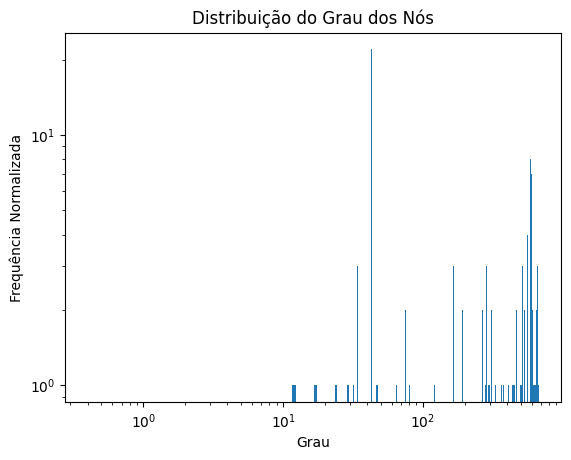

In [ ]:
from scipy.stats import linregress

def distribuicao_nos(matrix):
   # Crie um gráfico a partir da matriz de adjacência
    G = nx.Graph(matrix)

    # Calcule a distribuição do grau dos nós
    degree_sequence = [d for n, d in G.degree()]

    grau_medio = np.mean(degree_sequence)
    print(f"Grau Médio do Grafo: {grau_medio:.2f}")

    alpha = np.polyfit(np.log(range(1, len(degree_sequence) + 1)), np.log(sorted(degree_sequence, reverse=True)), 1)
    print(f"Coeficiente alfa (α): {alpha[0]:.4f}")


    # Crie um histograma da distribuição do grau
    plt.hist(degree_sequence, bins=range(0, max(degree_sequence) + 2), align='left', rwidth=0.8)
    plt.xlabel('Grau')
    plt.ylabel('Frequência Normalizada')
    plt.title('Distribuição do Grau dos Nós')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()


distribuicao_nos(matrizTopics)

In [ ]:
print(f"Número de componentes do Grafo: {len(dicionarioTopics)}")

Número de componentes do Grafo: 702


Coeficiente de Clusterização Global: 0.883


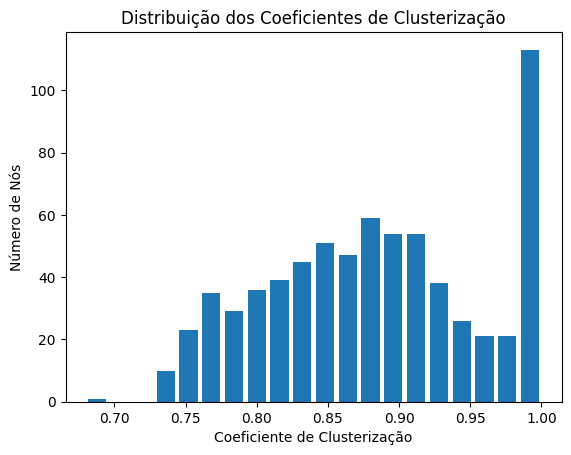

In [ ]:
def coeficiente_clusterização(matriz):
    # Crie um gráfico a partir da matriz de adjacência
    G = nx.Graph(matriz)

    # Calcule o coeficiente de clusterização de cada nó
    cluster_coefficients = nx.clustering(G)

    # Plote a distribuição dos coeficientes de clusterização
    plt.hist(list(cluster_coefficients.values()), bins=20, rwidth=0.8)
    plt.xlabel('Coeficiente de Clusterização')
    plt.ylabel('Número de Nós')
    plt.title('Distribuição dos Coeficientes de Clusterização')

    # Calcule o coeficiente de clusterização global do grafo
    global_cluster_coefficient = nx.average_clustering(G)

    print(f"Coeficiente de Clusterização Global: {global_cluster_coefficient:.3f}")

    plt.show()

coeficiente_clusterização(matrizTopics)

Distância Média entre Nós: 1.3300332044982544


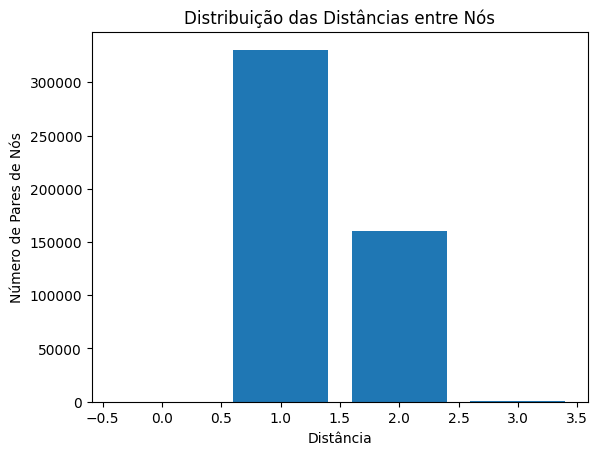

In [ ]:
def distribuicao_distancias(matrix):
    # Crie um gráfico a partir da matriz de adjacência
    G = nx.Graph(matrix)

    # Calcule a distância média entre todos os pares de nós
    average_shortest_path_length = nx.average_shortest_path_length(G)

    print("Distância Média entre Nós:", average_shortest_path_length)

    # Calcule as distâncias entre todos os pares de nós
    all_shortest_paths = dict(nx.shortest_path_length(G))

    # Crie uma lista com todas as distâncias
    distancias = []
    for source, targets in all_shortest_paths.items():
        for target, distance in targets.items():
            if source != target:  # Exclua distâncias para o próprio nó
                distancias.append(distance)

    # Plote a distribuição das distâncias
    plt.hist(distancias, bins=range(0, max(distancias) + 2), align='left', rwidth=0.8)
    plt.xlabel('Distância')
    plt.ylabel('Número de Pares de Nós')
    plt.title('Distribuição das Distâncias entre Nós')

    plt.show()

distribuicao_distancias(matrizTopics)

Betweenness Centrality:
Nó Mudança e melhoria do Sistema do Fórum: 0.000
Nó Mecanismo de busca do fórum: 0.001
Nó Listagem de todos os tópicos do fórum: 0.000
Nó Novo acervo do Religião é Veneno: 0.001
Nó Problema no servidor - 07/02/2023: 0.001
Nó Aniversário dos fóruns que deram continuidade ao fCC: 0.000
Nó Avatares para todos: 0.001
Nó Backup do fórum: 0.000
Nó Comunicados gerais: 0.001
Nó Migração do fórum Manjaro BR: 0.000
Nó Por onde andam antigos participantes?: 0.001
Nó Aplicativo Clube Veneno para Android: 0.000
Nó Solução temporária para resolver problemas com a mudança do tema do fórum: 0.000
Nó Dúvidas a respeito de postagem de vídeos: 0.000
Nó Tópico de teste - Fusão de Origem e Destino: 0.000
Nó Tópico de teste - Mover postagens - Destino (Cópia): 0.001
Nó Tópico de teste - Mover postagens - Destino: 0.000
Nó Tópico de teste - Mover postagens - Origem: 0.001
Nó Tópico de teste - Mover postagens - Origem (Cópia): 0.001
Nó Ùltimo teste: 0.001
Nó Teste de download: 0.000
Nó

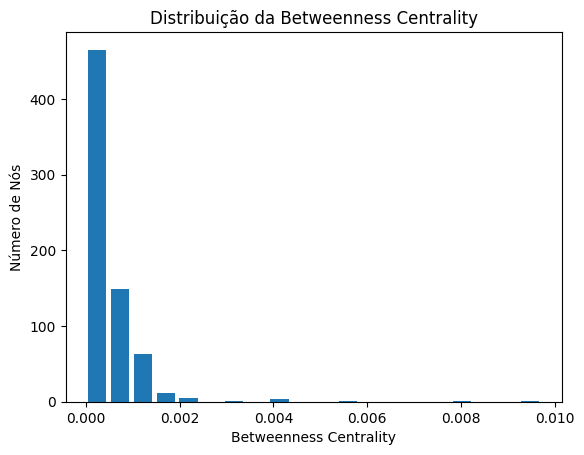

PageRank:
Nó Mudança e melhoria do Sistema do Fórum: 0.001
Nó Mecanismo de busca do fórum: 0.002
Nó Listagem de todos os tópicos do fórum: 0.001
Nó Novo acervo do Religião é Veneno: 0.003
Nó Problema no servidor - 07/02/2023: 0.003
Nó Aniversário dos fóruns que deram continuidade ao fCC: 0.001
Nó Avatares para todos: 0.002
Nó Backup do fórum: 0.002
Nó Comunicados gerais: 0.002
Nó Migração do fórum Manjaro BR: 0.001
Nó Por onde andam antigos participantes?: 0.001
Nó Aplicativo Clube Veneno para Android: 0.001
Nó Solução temporária para resolver problemas com a mudança do tema do fórum: 0.000
Nó Dúvidas a respeito de postagem de vídeos: 0.002
Nó Tópico de teste - Fusão de Origem e Destino: 0.001
Nó Tópico de teste - Mover postagens - Destino (Cópia): 0.002
Nó Tópico de teste - Mover postagens - Destino: 0.001
Nó Tópico de teste - Mover postagens - Origem: 0.001
Nó Tópico de teste - Mover postagens - Origem (Cópia): 0.002
Nó Ùltimo teste: 0.002
Nó Teste de download: 0.001
Nó Teste de cria

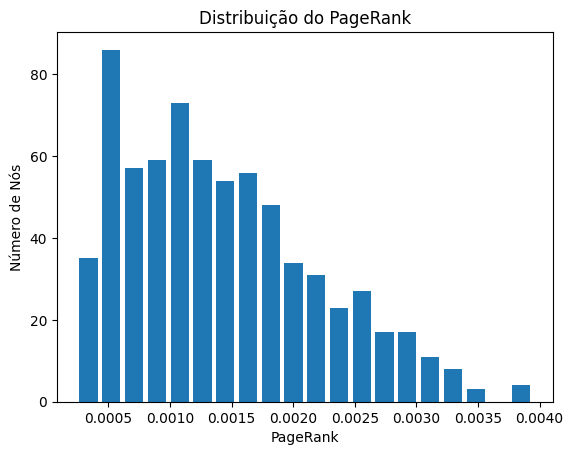

In [ ]:
def centralidade_nos(matrix, dicionario):
    # Crie um gráfico a partir da matriz de adjacência
    G = nx.Graph(matrix)

    # Calcule a betweenness centrality dos nós
    betweenness_centrality = nx.betweenness_centrality(G)

    # Calcule o PageRank dos nós
    pagerank = nx.pagerank(G)

    # Plote a distribuição da betweenness centrality
    plt.hist(list(betweenness_centrality.values()), bins=20, rwidth=0.8)
    plt.xlabel('Betweenness Centrality')
    plt.ylabel('Número de Nós')
    plt.title('Distribuição da Betweenness Centrality')

    # Exiba os valores da betweenness centrality para cada nó
    print("Betweenness Centrality:")
    for node, centrality in betweenness_centrality.items():
        print(f"Nó {dicionario[node]}: {centrality:.3f}")

    plt.show()

    # Plote a distribuição do PageRank
    plt.hist(list(pagerank.values()), bins=20, rwidth=0.8)
    plt.xlabel('PageRank')
    plt.ylabel('Número de Nós')
    plt.title('Distribuição do PageRank')

    # Exiba os valores do PageRank para cada nó
    print("PageRank:")
    for node, rank in pagerank.items():
        print(f"Nó {dicionario[node]}: {rank:.3f}")

    plt.show()

centralidade_nos(matrizTopics, dicionarioTopics)

Assortatividade: -0.07397136142231182
Coeficiente de Pearson: -0.06842663368248253


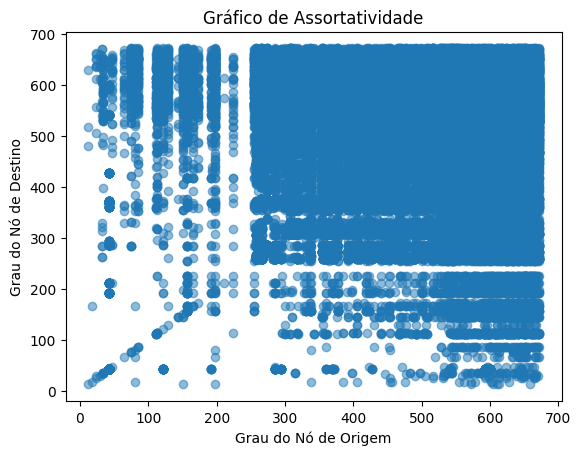

In [ ]:
from scipy.stats import pearsonr

def assortatividade_grafo(matrix):
    # Crie um gráfico a partir da matriz de adjacência
    G = nx.Graph(matrix)

    # Calcule a assortatividade
    assortativity = nx.degree_assortativity_coefficient(G)

    # Calcule o grau dos nós
    graus = dict(G.degree())

    # Crie listas para os graus dos nós conectados
    source_degrees = []
    target_degrees = []

    # Preencha as listas de graus dos nós conectados
    for edge in G.edges():
        source_degrees.append(graus[edge[0]])
        target_degrees.append(graus[edge[1]])

    # Calcule o coeficiente de Pearson
    pearson_coefficient, _ = pearsonr(source_degrees, target_degrees)

    # Plote o gráfico da assortatividade
    plt.scatter(source_degrees, target_degrees, alpha=0.5)
    plt.xlabel('Grau do Nó de Origem')
    plt.ylabel('Grau do Nó de Destino')
    plt.title('Gráfico de Assortatividade')

    # Exiba o coeficiente de Pearson
    print("Assortatividade:", assortativity)
    print("Coeficiente de Pearson:", pearson_coefficient)

    plt.show()

assortatividade_grafo(matrizTopics)